# Draw a map of EU memberstates and participating countries

## Get data

In [40]:
import os
#fname = 'ne_10m_admin_0_boundary_lines_land.zip'
fname = 'TM_WORLD_BORDERS-0.3.zip'
shpname = fname[:-4] + '.shp'
if not os.path.exists(fname):
    if not os.path.exists(shpname):
        # get data
        #!wget http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
        !wget http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
            
cmd = "unzip " + fname
os.system(cmd)
os.system('rm ' + fname)
!ls

countries.txt	  TM_WORLD_BORDERS-0.3.dbf  TM_WORLD_BORDERS-0.3.shx
europe_map.ipynb  TM_WORLD_BORDERS-0.3.prj
Readme.txt	  TM_WORLD_BORDERS-0.3.shp


## Do plotting

In [41]:
%matplotlib inline
#http://nbviewer.ipython.org/github/rjtavares/numbers_arent_people/blob/master/experiments/Plotting%20with%20Basemap%20and%20Shapefiles.ipynb

from matplotlib.collections import LineCollection
import numpy as np
from mpl_toolkits.basemap import Basemap
import shapefile
import matplotlib.pyplot as plt



#print r.fields
#print "\n----------------------------------------------------------------------------------\n"
##for record in records:
#    print record

class Map(object):
    def __init__(self):
        self.x1 = -30.  # europe coordinates
        self.x2 = 35.
        self.y1 = 30.
        self.y2 = 72.
    
    def read_shape(self, shpname):
        # read shapefile
        r = shapefile.Reader(shpname)
        #print r.fields
        self.shapes = r.shapes()
        self.records = r.records()
  
    
    def draw(self):
        self._draw_basic()


    def _draw_basic(self):
        """
        This functions draws and returns a map of Portugal, either just of the mainland or including the Azores and Madeira islands.
        """

        fig = plt.figure(figsize=(15.7,12.3))
        self.ax = fig.add_subplot(111)

        projection='merc'
        llcrnrlat=-80
        urcrnrlat=90
        llcrnrlon=-180
        urcrnrlon=180
        resolution='i'

        m = Basemap(projection=projection, llcrnrlat=self.y1, urcrnrlat=self.y2, llcrnrlon=self.x1,
                    urcrnrlon=self.x2, resolution=resolution, ax=self.ax)
        m.drawcoastlines()
        m.drawmapboundary()
        #m.drawcountries()
        #m.fillcontinents(color = '#C0C0C0')
        m.fillcontinents(color = 'lightgrey')
        
        self.m = m

    def draw_details(self, names=None, color='red'):
        
        names1 = []
        for n in names:
            names1.append(n.upper())
        
        for record, shape in zip(self.records,self.shapes):
            #read shape
            if len(shape.points) < 1:
                continue
            lons,lats = zip(*shape.points)
            data = np.array(self.m(lons, lats)).T

            #each shape may have different segments
            if len(shape.parts) == 1:
                segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])

            #draws the segments, and sets its properties. A colormap is used to get the gradient effect.
            lines = LineCollection(segs,antialiaseds=(1,))
            #lines.set_facecolors(cm.YlGn(record[-1]))
            if record[4].upper() in names1:
                lines.set_facecolors(color)
            lines.set_edgecolors('k')
            lines.set_linewidth(1)
            self.ax.add_collection(lines)
        


        


[('DeletionFlag', 'C', 1, 0), ['FIPS', 'C', 2, 0], ['ISO2', 'C', 2, 0], ['ISO3', 'C', 3, 0], ['UN', 'N', 3, 0], ['NAME', 'C', 50, 0], ['AREA', 'N', 7, 0], ['POP2005', 'N', 10, 0], ['REGION', 'N', 3, 0], ['SUBREGION', 'N', 3, 0], ['LON', 'N', 8, 3], ['LAT', 'N', 7, 3]]


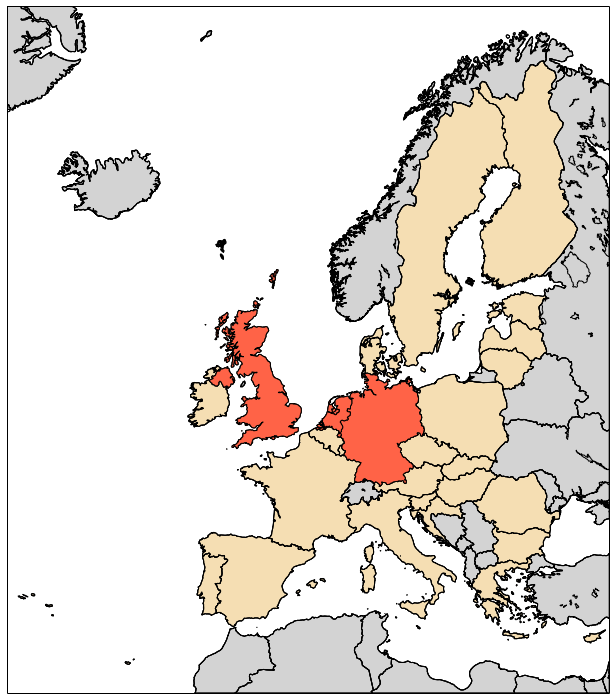

In [45]:
# create map
M = Map()
M.read_shape(shpname)
M.draw()
d=np.loadtxt('countries.txt', skiprows=1, dtype='str', delimiter='\t')
memberstates=[]
for r in d:
    memberstates.append(r)

M.draw_details(memberstates, color='wheat')  # plot EU memberstates
M.draw_details(['Germany','United Kingdom','Netherlands'], color='tomato')  # plot some more countries

M.ax.figure.savefig('countries.png', dpi=200, bbox_inches='tight')